In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import scipy as sci

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

#files
import os

In [2]:
os.getcwd()
df = pd.read_csv('../Data/train.csv')
dt = pd.read_csv('../Data/test.csv')

In [3]:
df.head(3)

,Index,Market,Day,Stock,x0,x1,x2,x3A,x3B,x3C,x3D,x3E,x4,x5,x6,y,Weight
0,0,1,1,363,0.002696,0.530040,0.400810,1.300048e-06,4.639533e-06,1.073594e-05,0.000022,0.000044,0.002212,6.214737e-07,200.000000,-0.000196,1.533780
1,1,1,1,1223,0.081093,1.366218,1.325157,1.656861e-05,3.024668e-05,5.261872e-05,0.000042,0.000042,0.010932,3.414868e-05,300.000000,-0.003798,0.843604
2,2,1,1,1372,0.009561,0.464871,0.328008,6.500872e-08,2.323204e-07,5.182686e-07,0.000001,0.000002,0.000306,4.079460e-08,159.692076,-0.000003,29.824024


In [4]:
df.shape

(623817, 17)

In [5]:
c = df.columns
c

Index(['Index', 'Market', 'Day', 'Stock', 'x0', 'x1', 'x2', 'x3A', 'x3B',
       'x3C', 'x3D', 'x3E', 'x4', 'x5', 'x6', 'y', 'Weight'],
      dtype='object')

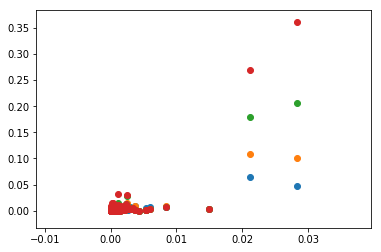

In [6]:
fig = plt.figure()
axis = fig.add_subplot(111)
axis.scatter(df.x3A,df.x3B)
axis.scatter(df.x3A,df.x3C)
axis.scatter(df.x3A,df.x3D)
axis.scatter(df.x3A,df.x3E)

In [12]:
corr = sci.correlate(df.x3B,df.x3C,'same')

KeyboardInterrupt: 

In [ ]:
len = corr.shape[0]
x = np.linspace(1,len,len)

In [ ]:
plt.scatter(x,corr)

In [92]:
x2 = [i for i in range(len)]

TypeError: 'Int64Index' object is not callable

In [ ]:
plt.scatter(x2,corr)

In [ ]:
trange = df.index[df.x3B<0.02]

In [ ]:
plt.scatter(df.x3C[range],df.x3D[range])

In [94]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [95]:
list(range(5))

[0, 1, 2, 3, 4]

In [96]:
list = [1]

In [97]:
print(list)

[1]


In [98]:
list(range(5))

TypeError: 'list' object is not callable

In [99]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [100]:
range(1,5)

range(1, 5)

In [101]:
list(range(1,5))

[1, 2, 3, 4]

In [102]:
for i in range(1,5):
    print(i)

1
2
3
4


In [7]:
# find the daily mean
# find how many values per stock per day
mean_val = df.groupby(['Stock'])['y'].mean()
mean_val.head(3)

Stock
0    0.000890
1    0.000151
2   -0.000069
Name: y, dtype: float64

In [8]:
mean_val.shape
stock = df.groupby(['Stock'])['Stock']

In [9]:
df['yp'] = df['Stock'].map(mean_val)

In [10]:
df.Day[df.Stock<10]

89981       1
90213       1
90391       2
90624       2
90635       2
90806       5
91040       5
91222       6
91457       6
91468       6
91639       7
91876       7
91888       7
92059       8
92293       8
92305       8
92478       9
92714       9
92726       9
92899      12
93131      12
93143      12
93314      19
93540      19
93552      19
93723      20
93950      20
93962      20
94132      21
94360      21
         ... 
619034    643
619206    644
619378    649
619550    651
619719    658
619880    659
620041    660
620202    663
620363    667
620525    671
620689    673
620853    677
621017    678
621182    680
621347    687
621506    691
621666    692
621825    694
621987    695
622149    699
622312    702
622470    709
622627    712
622784    713
622942    714
623100    716
623258    719
623416    720
623574    728
623733    729
Name: Day, Length: 2042, dtype: int64

In [11]:
t1 = pd.Series([1,3,3])
t2 = pd.Series(['a','b','c'])

In [12]:
t2.map(t1)

0   NaN
1   NaN
2   NaN
dtype: float64

In [13]:
df['dff'] = (df.y - df.yp)/df.y

(array([  1438.,   2198.,   4218.,  10137.,  58356., 488592.,  32257.,
          7566.,   3566.,   1919.]),
 array([-9.99956692e+00, -7.99991418e+00, -6.00026143e+00, -4.00060868e+00,
        -2.00095594e+00, -1.30319238e-03,  1.99834955e+00,  3.99800230e+00,
         5.99765504e+00,  7.99730779e+00,  9.99696054e+00]),
 <a list of 10 Patch objects>)

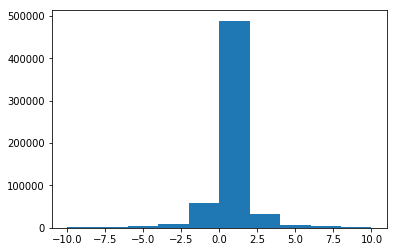

In [14]:
plt.hist(df.dff[abs(df.dff) < 10])

In [15]:
model = sklearn.linear_model.LinearRegression()


In [24]:
index = df[abs('y')]
x = df[['x4']]
y = df['y']
x.shape
y.shape       
model.fit(x, y)

print('alpha:  \t', model.intercept_)
print('beta:   \t', model.coef_[0])
print('r^2 score:\t', model.score(X, y))

alpha:  	 -7.289202824366338e-05
beta:   	 0.08369168607561565
r^2 score:	 0.0341790057711725


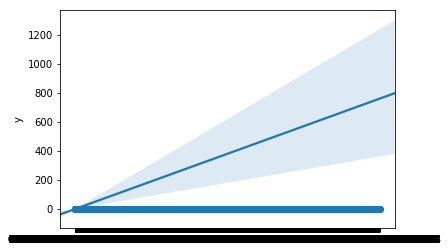

In [25]:
sns.regplot(x[::100],y[::100])

In [19]:
x = df[['x4']]

In [20]:
x.shape

(623817, 1)

In [21]:
y = df[['y']]
model.fit(x,y)
print('r^2', model.score(x,y))

r^2 0.0341790057711725


In [186]:
sns.scatter(x,y)

AttributeError: module 'seaborn' has no attribute 'scatter'

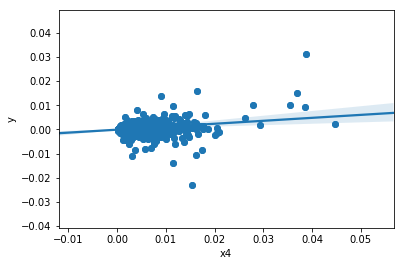

In [31]:
x = df.x4
plt.scatter(x[::100],y[::100])
sns.regplot(x[::100],y[::100])

In [33]:
index = df.index[abs(df.y) < 0.01]

In [35]:
yp = df.y[index]

In [38]:
xp = df.x4[index]

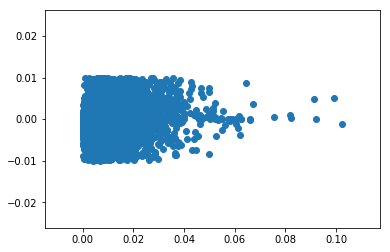

In [39]:
plt.scatter(xp,yp)

In [85]:
x_train = df.drop(['y'],axis = 1)
y_train = df.y

In [166]:
x_test = dt


In [93]:
#get rid of NaN values
#find out which columns has null values
newdf = df
for i in range(len(df.columns)):
    index = newdf.index[df[columns[i]].isnull()]
    if index.shape[0]>0:
        print(columns[i],index.shape)
        df[columns[i]] = df[columns[i]].fillna(0)

x1 (55,)
x2 (5,)


In [95]:
for i in range(len(df.columns)):
    index = df.index[df[columns[i]].isnull()]
    print(columns[i],index.shape)

Index (0,)
Market (0,)
Day (0,)
Stock (0,)
x0 (0,)
x1 (0,)
x2 (0,)
x3A (0,)
x3B (0,)
x3C (0,)
x3D (0,)
x3E (0,)
x4 (0,)
x5 (0,)
x6 (0,)
y (0,)
Weight (0,)


In [86]:
#Gaussian naive bayesian
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)


GaussianNB(priors=None)

In [80]:
#how about just classifying whether y is positive or negative
posindex = df.index[df.y>=0]
negindex = df.index[df.y<0]


In [82]:
newdf = df
newdf.y[posindex] = 1
newdf.y[negindex] = 0

/Users/tracy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/tracy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [83]:
newdf.y

0         0.0
1         0.0
2         0.0
3         0.0
4         1.0
5         0.0
6         1.0
7         1.0
8         1.0
9         1.0
10        0.0
11        0.0
12        0.0
13        1.0
14        1.0
15        0.0
16        0.0
17        1.0
18        1.0
19        1.0
20        0.0
21        1.0
22        1.0
23        0.0
24        1.0
25        1.0
26        0.0
27        1.0
28        1.0
29        1.0
         ... 
623787    1.0
623788    0.0
623789    1.0
623790    1.0
623791    1.0
623792    1.0
623793    0.0
623794    0.0
623795    1.0
623796    1.0
623797    1.0
623798    0.0
623799    1.0
623800    0.0
623801    1.0
623802    1.0
623803    1.0
623804    0.0
623805    1.0
623806    1.0
623807    0.0
623808    0.0
623809    0.0
623810    1.0
623811    0.0
623812    0.0
623813    1.0
623814    1.0
623815    1.0
623816    0.0
Name: y, Length: 623817, dtype: float64

In [84]:
df = newdf

In [87]:
#naive gaussian 57.22%
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian

57.22

In [162]:
# decision tree 100%
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
#Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

ValueError: Unknown label type: 'continuous'

In [91]:
#SVN 57.43%
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
#Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
acc_linear_svc

57.43

In [92]:
#how about go back to regression again instead of classfier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
df = pd.read_csv('../Data/train.csv')

In [96]:
# training data sets
x_train = df.drop(['y'],axis = 1)
y_train = df.y

In [97]:
#KNN Regressor 25.6%
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
acc_knn = round(knn.score(x_train,y_train)*100,2)
acc_knn

In [209]:
#Random Forest 80%
rf = RandomForestRegressor()
rf.fit(newx,y_train,sample_weight = x_weight)
acc_rf = round(rf.score(newx,y_train)*100,2)
acc_rf

51.86

In [100]:
#SGD Regressor 0% lol
sgd = SGDRegressor()
sgd.fit(x_train,y_train)
acc_sgd = round(sgd.score(x_train,y_train)*100,2)
acc_sgd

/Users/tracy/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


-1.4463969506930502e+47

In [208]:
#Decision Tree Regressor 92.59%!!!
decisiontree = DecisionTreeRegressor()
decisiontree.fit(newx,y_train,sample_weight = x_weight)
acc_dt = round(decisiontree.score(newx,y_train)*100,2)
yp = decisiontree.predict(x_test)
acc_dt

55.18

In [103]:
 X_folds = np.array_split(df.x1, 3)

In [109]:
testarray = np.arange(9.8)
TestSplit = np.array_split(testarray,3)
TestSplit

[array([0., 1., 2., 3.]), array([4., 5., 6.]), array([7., 8., 9.])]

In [131]:
#np.arrange(start,stop,step)
#np.array_split(array, NSplits)
# split into 5 sets and validate
xsplit = np.array_split(x_train,5)
ysplit = np.array_split(y_train,5)
fold_score = list()
for k in range(5):
    xfold_train = list(xsplit)
    #pop off the kth set
    xfold_test = xfold_train.pop(k)
    #concatenate the rest
    xfold_train = np.concatenate(xfold_train)
    yfold_train = list(ysplit)
    #pop off the kth set
    yfold_test = yfold_train.pop(k)
    #concatenate the rest
    yfold_train = np.concatenate(yfold_train)
    #test each set and append scores
    rf.fit(xfold_train,yfold_train)
    print(rf.score(xfold_test,yfold_test))
    #fold_score.append(rf.fit(xfold_train, yfold_train).score(xfold_test, yfold_test))    

-0.07728700785131926
-0.051763453528250514
0.0659693075757749
0.1280588270075126
0.10305517210521475


In [221]:
x_train = newx


In [224]:
#using random forest regressor, very low, around 10%
# kfold returns array indexes
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def run_kfold(model):
    kf = KFold(n_splits=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(x_train):
        fold += 1
        xfold_train, xfold_test = x_train.values[train_index], x_train.values[test_index]
        yfold_train, yfold_test = y_train.values[train_index], y_train.values[test_index]
        xfold_weight = x_weight[train_index]
        model.fit(xfold_train, yfold_train)
        #predictions = model.predict(xfold_test)
        accuracy = model.score(xfold_test, yfold_test)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(rf)

Fold 1 accuracy: 0.08160542313407126
Fold 2 accuracy: -0.04748002210001068
Fold 3 accuracy: -0.017682503865019905
Fold 4 accuracy: 0.009632548771566274
Fold 5 accuracy: 0.0150056421368846
Fold 6 accuracy: 0.12184604840497038
Fold 7 accuracy: 0.14461839290483514
Fold 8 accuracy: 0.11090489483175149


KeyboardInterrupt: 

In [256]:
# gridsearchCV
# what parameters are there for random forest regressor?
from sklearn.model_selection import GridSearchCV
def RFTuneParameter(x_train, y_train, weight):
    rf = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [20,30,40],
            "max_depth"         : [3, 4, 5],
            "min_samples_split" : [2,4,6],
            "min_weight_fraction_leaf" : [0.001, 0.01, 0.02]
            }
    rfcv = GridSearchCV(rf,param_grid)
    if type(weight)==str:
        rfcv.fit(x_train,y_train)
    else:
        rfcv.fit(x_train,y_train,weight)
    return rfcv.best_score_, rfcv.best_params_
a = RFTuneParameter(newx,y_train,x_weight)

KeyboardInterrupt: 

In [157]:
rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [167]:
#get rid of NaN values
#find out which columns has null values
newdt = dt
for i in range(len(dt.columns)):
    index = newdt.index[dt[columns[i]].isnull()]
    if index.shape[0]>0:
        print(columns[i],index.shape)
        dt[columns[i]] = dt[columns[i]].fillna(0)

x1 (62,)
x2 (2,)


In [186]:
x_test = newdt
print(x_train.columns)
print(x_test.columns)
x_weight = np.array(x_train.Weight)
newx = x_train.drop(['Weight'],axis = 1)

Index(['Index', 'Market', 'Day', 'Stock', 'x0', 'x1', 'x2', 'x3A', 'x3B',
       'x3C', 'x3D', 'x3E', 'x4', 'x5', 'x6', 'Weight'],
      dtype='object')
Index(['Index', 'Market', 'Day', 'Stock', 'x0', 'x1', 'x2', 'x3A', 'x3B',
       'x3C', 'x3D', 'x3E', 'x4', 'x5', 'x6'],
      dtype='object')


In [229]:
# use command / to comment out a block
#Decision Tree Regressor 92.59%!!!
decisiontree = DecisionTreeRegressor()
decisiontree.fit(newx,y_train)
#acc_dt = round(decisiontree.score(new_x,y_train)*100,2)
yp = pd.Series(decisiontree.predict(x_test)).rename('y')



In [196]:
yp.index.name = 'Index'
yp.head()

Index
0    0.000624
1    0.000031
2   -0.000025
3    0.000031
4    0.000361
Name: y, dtype: float64

(array([7.0000e+00, 5.0000e+00, 3.6000e+01, 4.4100e+02, 6.0951e+05,
        3.0039e+04, 3.0500e+02, 6.8000e+01, 1.7000e+01, 2.0000e+00]),
 array([-0.04956444, -0.03941969, -0.02927494, -0.0191302 , -0.00898545,
         0.0011593 ,  0.01130405,  0.0214488 ,  0.03159355,  0.0417383 ,
         0.05188305]),
 <a list of 10 Patch objects>)

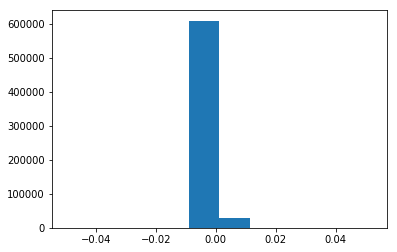

In [197]:
plt.hist(yp)

In [201]:
yp.to_csv('RandomForestRegressor_model.csv', header=True)

In [202]:
test = pd.read_csv('RandomForestRegressor_model.csv')

In [203]:
test.info

<bound method DataFrame.info of          Index         y
0            0  0.000624
1            1  0.000031
2            2 -0.000025
3            3  0.000031
4            4  0.000361
5            5  0.000031
6            6  0.000031
7            7  0.000031
8            8  0.000713
9            9  0.000031
10          10  0.000031
11          11 -0.000025
12          12  0.000031
13          13  0.000031
14          14  0.000031
15          15  0.000198
16          16 -0.000021
17          17  0.000031
18          18  0.000688
19          19  0.000198
20          20  0.000236
21          21 -0.000025
22          22 -0.000025
23          23  0.000031
24          24  0.000031
25          25  0.000236
26          26  0.000236
27          27  0.000031
28          28  0.000031
29          29  0.000409
...        ...       ...
640400  640400  0.000031
640401  640401  0.000038
640402  640402 -0.000140
640403  640403 -0.000059
640404  640404  0.003978
640405  640405 -0.000961
640406  640406  0.

694.0019300358749

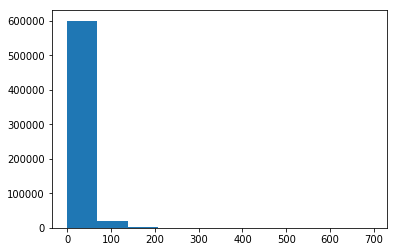

In [219]:
plt.hist(x_weight)
max(x_weight)

In [230]:
importance = decisiontree.feature_importances_

([<matplotlib.axis.XTick at 0x1a42754a90>,
 <a list of 15 Text xticklabel objects>)

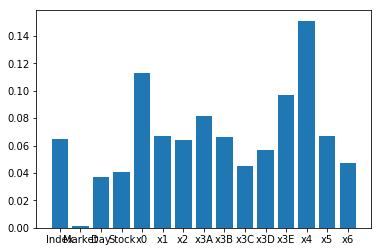

In [232]:
plt.bar(range(x_train.shape[1]),importance)
plt.xticks(range(x_train.shape[1]),x_train.columns)

In [233]:
x_train = df.drop(['y'], axis = 1)

In [234]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

([<matplotlib.axis.XTick at 0x1a426cbc18>,
 <a list of 16 Text xticklabel objects>)

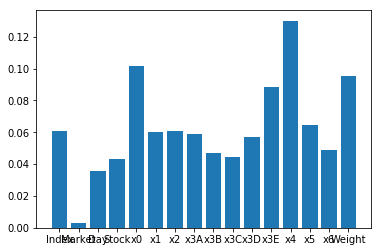

In [235]:
#get feature importance from random forest regression
importance = rf.feature_importances_
plt.bar(range(x_train.shape[1]),importance)
plt.xticks(range(x_train.shape[1]),x_train.columns)

In [236]:
xpseudo_weight = np.ones(x_test.shape[0])

In [240]:
type('none')

str

In [241]:
type(0.03)

float

In [242]:
test = np.array(3)

In [255]:
type(x_weight)==ndarray

NameError: name 'ndarray' is not defined

In [253]:
type('none')==str

True